In [1]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
#from matplotlib import rc
#%matplotlib inline
#%matplotlib notebook
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets


## Cobweb

## Introduction to Cobweb Plots

A cobweb plot is a graphical tool used to visualize the behavior of iterative maps, particularly in the study of discrete dynamical systems. It provides an intuitive way to understand how repeated application of a function affects an initial value over time.

In a cobweb plot, the function $y = f(x)$ and the line $y = x$ are plotted on the same axes. Starting from an initial point $x_0$, the plot traces the sequence of values generated by the iteration $x_{n+1} = f(x_n)$ by alternating vertical and horizontal lines between the function and the diagonal. This process visually demonstrates convergence to fixed points, periodic cycles, or the onset of chaotic behavior, depending on the function and its parameters.

Cobweb plots are especially useful for exploring nonlinear maps such as the logistic map, helping to reveal the rich dynamics that can arise from simple iterative processes.

In [13]:
# Use LaTeX throughout the figure for consistency
#rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 16})
#c('text', usetex=True)
# Figure dpi
dpi = 72

def plot_cobweb(f, r, x0, xmax=1, nmax=40):
    """Make a cobweb plot.

    Plot y = f(x; r) and y = x for 0 <= x <= 1, and illustrate the behaviour of
    iterating x = f(x) starting at x = x0. r is a parameter to the function.

    """
    x = np.linspace(0, xmax, 500)
    fig = plt.figure(figsize=(600/dpi, 450/dpi), dpi=dpi)
    ax = fig.add_subplot(111)

    # Plot y = f(x) and y = x
    ax.plot(x, f(x, r), c='black', lw=2)
    ax.plot(x, x, c='grey', lw=2)

    # Iterate x = f(x) for nmax steps, starting at (x0, 0).
    # px, py = np.empty((2,nmax+1,2))
    # px[0], py[0] = x0, 0
    # for n in range(1, nmax, 2):
    #     px[n] = px[n-1]
    #     py[n] = f(px[n-1], r)
    #     px[n+1] = py[n]
    #     py[n+1] = py[n]
    #px, py = np.empty((2,nmax+1,2))
    px=[]
    py=[]
    x=x0
    y=f(x0,r)
    px.append(x0)
    py.append(0)
    px.append(x0)
    py.append(f(x0,r))
    
    for n in range(1, nmax):
        x=y
        px.append(x)
        py.append(y)
        
        y=f(x,r)
        px.append(x)
        py.append(y)
        
        # px[n] = px[n-1]
        # py[n] = f(px[n-1], r)
        # px[n+1] = py[n]
        # py[n+1] = py[n]
    # Plot the path traced out by the iteration.
    ax.plot(px, py, c='b', alpha=0.7)
    plt.show()
    # Annotate and tidy the plot.
#    ax.minorticks_on()
#    ax.grid(which='minor', alpha=0.5)
#    ax.grid(which='major', alpha=0.5)
#    ax.set_aspect('equal')
#    ax.set_xlabel('$x$')
#    ax.set_ylabel(f.latex_label)
#    ax.set_title('$x_0 = {:.1}, r = {:.2}$'.format(x0, r))
#
#    plt.savefig('cobweb_{:.1}_{:.2}.png'.format(x0, r), dpi=dpi)



### Cobweb for $x_{n+1}=rx_n^2$

In [17]:


func_xr = lambda x,r: r*x**2



def interactive_cob_xr(r= 2, x0=0.5, nmax=1):
    plot_cobweb(func_xr, r= r, x0=x0, xmax=1/r, nmax=nmax)

coblayout=Layout(width='10cm')

interact(interactive_cob_xr, r=widgets.FloatSlider(min=0.3, max=3.9, step=0.1, value=1., description='r:',
                                  continuous_update=False,layout=coblayout,readout=True, readout_format='.1f'),
            x0=widgets.Dropdown(
                options=[0.1, 0.25, 0.5, 0.75,.9],
                value=0.5,
                description='x0:',
                disabled=False,),
            nmax=widgets.IntSlider(min=1, max=20, step=1, value=1, description='n:',
                                  continuous_update=False,layout=coblayout,readout=True, readout_format='.0f')
             );

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='r:', layout=Layout(width='1…

### Cobweb for $r \sin(x_i$)

In [29]:
func_sin = lambda x,r: r*np.sin(x)
def interactive_cob_sin(r= 2, x0=1.5, nmax=4):
    plot_cobweb(func_sin, r= r, x0=x0, xmax=3.14, nmax=nmax)

coblayout=Layout(width='10cm')

interact(interactive_cob_sin, r=widgets.FloatSlider(min=0.9, max=3.9, step=0.1, value=1., description='r:',
                                  continuous_update=False,layout=coblayout,readout=True, readout_format='.1f'),
            x0=widgets.Dropdown(
                options=[0.1, 0.25, 0.5, 0.75,1.5,2,3],
                value=2,
                description='x0:',
                disabled=False,),
            nmax=widgets.IntSlider(min=1, max=20, step=1, value=1, description='n:',
                                  continuous_update=False,layout=coblayout,readout=True, readout_format='.0f')
             );

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='r:', layout=Layout(width='1…

## Logistic map

## Introduction to the Logistic Map

The logistic map is a classic example of how simple nonlinear dynamical equations can exhibit a rich variety of behaviors, including fixed points, periodic oscillations, and chaos. It is defined by the recurrence relation:

$$
x_{n+1} = r x_n (1 - x_n)
$$

where $ x_n$ represents the population at generation $ n$ (scaled between 0 and 1), and $r $ is a parameter controlling the growth rate. As $ r $ varies, the logistic map demonstrates transitions from stable equilibrium to periodic cycles and eventually to chaotic dynamics, making it a fundamental model in the study of nonlinear systems and chaos theory.

### Equilibrium and Stability Analysis

To find the equilibrium points of the logistic map, we set $x_{n+1} = x_n = x^*$:

$$
x^* = r x^* (1 - x^*)
$$

Solving for $x^*$ gives:

$$
x^* [1 - r (1 - x^*)] = 0 \implies x^* = 0 \quad \text{or} \quad x^* = 1 - \frac{1}{r}
$$

**Stability:**  
The stability of an equilibrium point $x^*$ is determined by the derivative of the map:

$$
f'(x) = r (1 - 2x)
$$

An equilibrium is stable if $|f'(x^*)| < 1$.


- For $x^* = 0$: 

$$
|f'(0)| = |r| < 1 \implies 0 < r < 1
$$

- For $x^* = 1 - \frac{1}{r}$:

$$|f'(x^*)| = |r (1 - 2(1 - \frac{1}{r}))| = |-r + 2| < 1$$

This gives $1 < r < 3$

Thus:
- $x^* = 0$ is stable for $0 < r < 1$
- $x^* = 1 - \frac{1}{r}$ is stable for $1 < r < 3$

### Conclusion

For $r > 3$, neither equilibrium point is stable, and the system exhibits periodic or chaotic behavior. Despite this, the values of $x_n$ remain bounded between 0 and 1 for $0 < r \leq 4$, illustrating how simple nonlinear maps can generate complex dynamics without diverging.

### Cobweb Plot of the Logistic Map

The cobweb plot is a graphical tool to visualize the iterative process of the logistic map:

$$
x_{n+1} = r x_n (1 - x_n)
$$

It shows how an initial value $x_0$ evolves under repeated application of the map for a given parameter $r$. The plot helps illustrate convergence to fixed points, periodic orbits, or chaotic behavior depending on the value of $r$. Use the interactive widget below to explore the dynamics by adjusting $r$, $x_0$, and the number of iterations.

In [21]:
func_logist = lambda x,r: r*x*(1-x)
def interactive_cob_logist(r= 2, x0=0.5, nmax=4):
    plot_cobweb(func_logist, r= r, x0=x0, xmax=1, nmax=nmax)

coblayout=Layout(width='9cm')

interact(interactive_cob_logist, r=widgets.FloatSlider(min=0.9, max=3.9, step=0.1, value=.9, description='r:',
                                  continuous_update=False,layout=coblayout,readout=True, readout_format='.1f'),
            x0=widgets.Dropdown(
                options=[0.1, 0.25, 0.5, 0.75],
                value=0.5,
                description='x0:',
                disabled=False,),
            nmax=widgets.IntSlider(min=1, max=20, step=1, value=1, description='n:',
                                  continuous_update=False,layout=coblayout,readout=True, readout_format='.0f')
             );

interactive(children=(FloatSlider(value=0.9, continuous_update=False, description='r:', layout=Layout(width='9…

### Periodic doubling

In [25]:
def logistic_one(r, x0, N):
    x = x0
    ys = []
    ys.append(x)
    for i in range(N):
        x = func_logist(x, r)
        ys.append(x)
    return ys

def logist_plot(r, x0, N):
    plt.plot(logistic_one(r, x0, N), 'x-')
    plt.axhline(1 - 1/r, color='red', linestyle='--', label='$x^* = 1 - 1/r$')
    plt.legend()
    plt.ylim(0, 1)

mylayout = Layout(width='10cm')
interact(logist_plot, r=widgets.FloatSlider(min=0.9, max=3.9, step=0.1, value=.9, description='r:',
                                  continuous_update=False, layout=mylayout, readout=True, readout_format='.1f'),
            x0=widgets.Dropdown(
                options=[0.1, 0.25, 0.5, 0.75],
                value=0.25,
                description='x0:',
                disabled=False,),
            N=widgets.IntSlider(min=10, max=400, step=10, value=20, description='N:',
                                  continuous_update=False, layout=mylayout, readout=True, readout_format='.1f')
         )

interactive(children=(FloatSlider(value=0.9, continuous_update=False, description='r:', layout=Layout(width='1…

<function __main__.logist_plot(r, x0, N)>

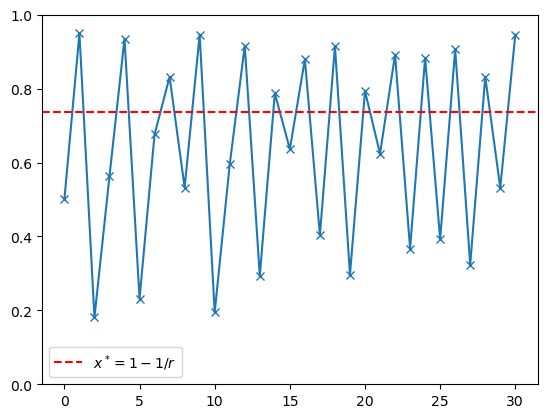

In [ ]:

xmax=30
#logist_plot(2.9,0.5,xmax)
#logist_plot(3.1,0.5,xmax)
#logist_plot(3.4491,0.5,xmax)
#logist_plot(3.54409,0.5,xmax)
#logist_plot(3.55644,0.5,xmax)
#logist_plot(3.79946,0.5,xmax)

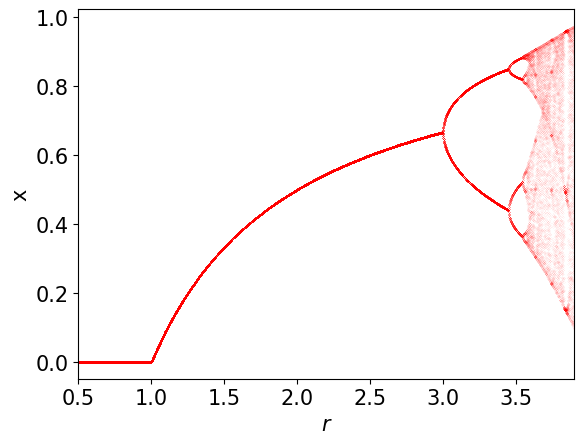

In [38]:

def f(x, r):
    return r * x * (1 - x)
ys = []
min_n=0.5
max_n=3.9
rs = np.linspace(min_n, max_n, 2000)
#rs = np.linspace(3.5, 4, 2000) # For Figure 14.16.
for r in rs:
    x = 0.1
    for i in range(500):
        x = f(x, r)
    for i in range(50):
        x = f(x, r)
        ys.append([r, x])

ys = np.array(ys)

plt.plot(ys[:, 0], ys[:, 1], 'r.', markersize=0.05)
plt.xlabel('$r$', fontsize=15)
plt.ylabel('x', fontsize=15)
plt.tick_params(labelsize=15)
plt.xlim(min_n,max_n)
plt.show()



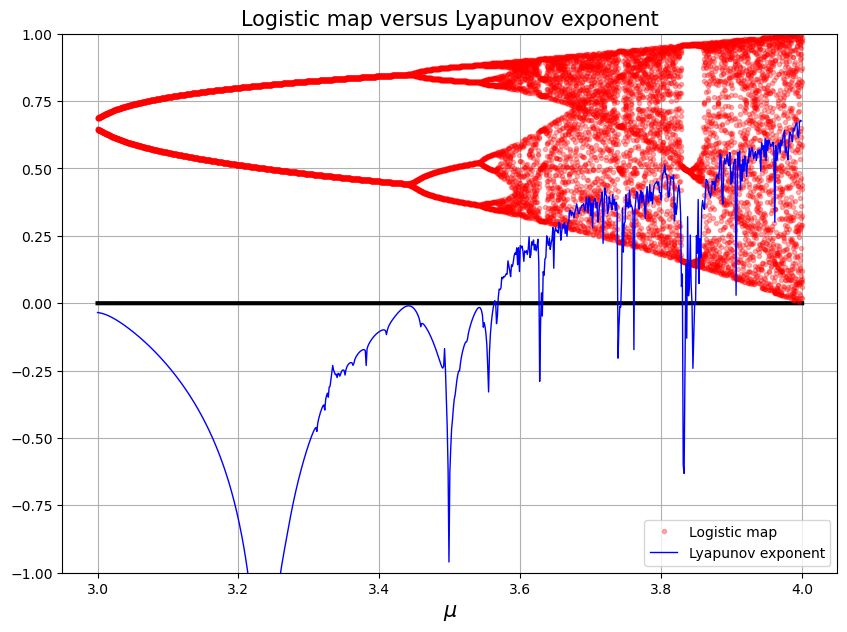

In [12]:
# Program 14c: Lyapunov exponents of the logistic map.
# See Figure 14.18.

num_points = 16000
result = []
lambdas = []
maps = []
xmin, xmax = 3, 4
mult = (xmax - xmin) * num_points

mu_values = np.arange(xmin, xmax, 20/num_points)

for r in mu_values:
    x = 0.1
    result = []
    for t in range(100):
        x = r * x * (1 - x)
        result.append(np.log(abs(r - 2*r*x)))
    lambdas.append(np.mean(result))
    # Ignore first 100 iterates.
    for t in range(20):
        x = r * x * (1 - x)
        maps.append(x)

fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(1,1,1)

xticks = np.linspace(xmin, xmax, mult)
zero = [0] * mult
ax1.plot(xticks, zero, 'k-', linewidth=3)
ax1.plot(xticks, maps,'r.', alpha = 0.3, label='Logistic map')
ax1.set_xlabel('r')
ax1.plot(mu_values, lambdas, 'b-', linewidth=1, label='Lyapunov exponent')
ax1.grid('on')
ax1.set_ylim(-1, 1)
ax1.set_xlabel('$\mu$', fontsize=15)
ax1.legend(loc='best')
ax1.set_title('Logistic map versus Lyapunov exponent', fontsize=15)

plt.show()


# Self similarity

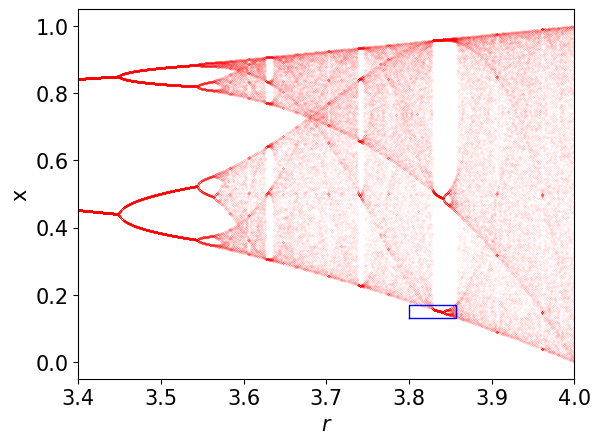

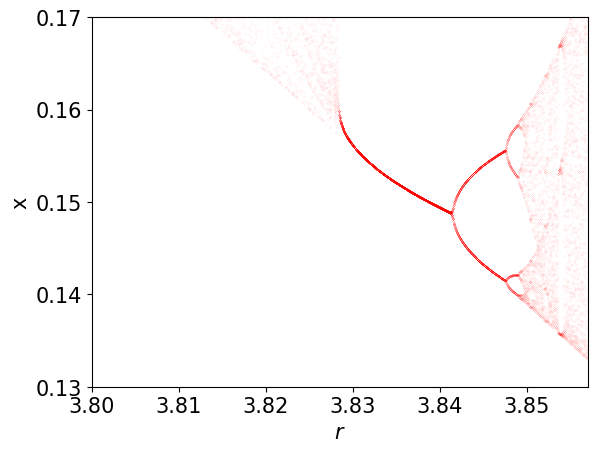

In [17]:


def f(x, r):
    return r * x * (1 - x)


ys = []
min_n=3.4
max_n=4

r_zoom=[3.8,3.857]
x_zoom=[0.13,0.17]
rs = np.linspace(min_n, max_n, 2000)
#rs = np.linspace(3.5, 4, 2000) # For Figure 14.16.
for r in rs:
    x = 0.1
    for i in range(500):
        x = f(x, r)
    for i in range(50):
        x = f(x, r)
        ys.append([r, x])

ys = np.array(ys)

plt.plot(ys[:, 0], ys[:, 1], 'r.', markersize=0.05)
plt.plot([r_zoom[0], r_zoom[1], r_zoom[1], r_zoom[0], r_zoom[0]], 
         [x_zoom[0], x_zoom[0], x_zoom[1], x_zoom[1], x_zoom[0]], 
         c='blue', lw=1)
plt.xlabel('$r$', fontsize=15)
plt.ylabel('x', fontsize=15)
plt.tick_params(labelsize=15)
plt.xlim(min_n,max_n)
plt.show()


rs = np.linspace(r_zoom[0], r_zoom[1], 2000)
ys = []
#rs = np.linspace(3.5, 4, 2000) # For Figure 14.16.
for r in rs:
    x = 0.1
    for i in range(500):
        x = f(x, r)
    for i in range(50):
        x = f(x, r)
        ys.append([r, x])

ys = np.array(ys)

plt.plot(ys[:, 0], ys[:, 1], 'r.', markersize=0.05)
plt.xlabel('$r$', fontsize=15)
plt.ylabel('x', fontsize=15)
plt.tick_params(labelsize=15)
plt.xlim(r_zoom[0], r_zoom[1])
plt.ylim(x_zoom[0], x_zoom[1])
plt.show()

